# Diagnosis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from IPython.display import Image

Let's again consider the Wiscon Breast Cancer dataset.

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
X = df.loc[:,2:]
Y = df.loc[:,1]
le = LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
from sklearn.learning_curve import learning_curve

In [11]:
pipe_lr = Pipeline([('sca',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',random_state=0))])

## Error Metrics

### Confusion Matrix

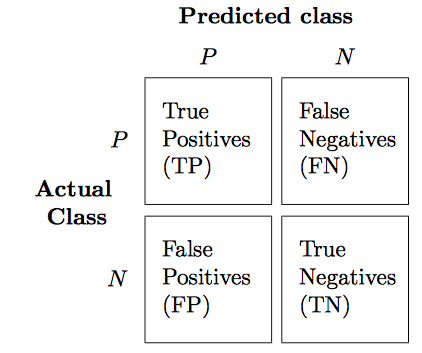

In [12]:
Image('cmatrix.png')

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
pipe_lr.fit(X_train,Y_train)
Y_pred = pipe_lr.predict(X_test)

In [15]:
pipe_lr.score(X_test,Y_test)

0.96491228070175439

In [16]:
confmat = confusion_matrix(Y_test,Y_pred)
confmat

array([[74,  2],
       [ 2, 36]])

In [17]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

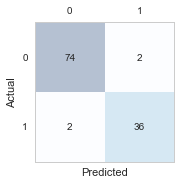

In [18]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)

### Precision

Of all the patients where we predicted y=1, what fraction actually has cancer.

$$precision =  \frac{true \ positives}{\#predicted \ positives}$$

$$= \frac{TP}{TP+FP}$$

Higher the precision, highest chance of cancer prediction is true.

Here in this example:

$$precision = \frac{34}{34+0} = 1$$


### Recall

Of all the patients that actually have cancer, what fraction did we correctly detect as having cancer ?

$$recall =  \frac{true \ positives}{\#actual \ positives}$$

$$= \frac{TP}{TP+FN}$$

Here in this example:

$$recall = \frac{34}{34+3}=0.918$$

Precision & Recall are high $\implies$ more confidence

In [19]:
from sklearn.metrics import precision_score,recall_score
print "Precision: ",precision_score(Y_test,Y_pred)
print "Recall: ",recall_score(Y_test,Y_pred)

Precision:  0.947368421053
Recall:  0.947368421053


### Trading off Precision & Recall

Consider:

Logistic Regression: $0\leq h_\theta(x) \leq 1$

predict 1 if $h_\theta(x) \geq 0.5$ 

predict 0 if $h_\theta(x) \leq 0.5$

Suppose if we want to predict $y=1$ (malignant) only if very confident then we should avoid False Positives.

therefore increase the threshold as $0.5+\delta$

Suppose if we want to avoid missing too many cases of cancer then avoid False Negatives.

therefore decrease the threshold as $0.5-\delta$

Predict $y=1$ all the time - highest Recall

Predict $y=1$ very sparingly - highest Precision

### F1 Score

$F_1$ Score is used to compare precision and recall scores.

$$F_1 \ Score = 2\frac{PR}{P+R}$$

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1_score(Y_test,Y_pred)

0.94736842105263153